In [1]:
pip install pandas

In [2]:
pip install seaborn

In [3]:
pip install scikit-learn

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('googleplaystore.csv')

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 635.3+ KB


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [9]:
mean_rating = df['Rating'].mean()
df['Rating'] = df['Rating'].fillna(mean_rating)
mean_rating

4.191512757553112

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 635.3+ KB


In [11]:
df.loc[df['Installs']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)

In [13]:
duplicates = df.duplicated()
df[duplicates]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,10000000,Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000,Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,10000000,Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,1000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,100000000,Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,10000,Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [14]:
df = df.drop_duplicates()

In [15]:
apps = df[['Category', 'Rating', 'Reviews', 'Installs']]

In [16]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  10358 non-null  object 
 1   Rating    10358 non-null  float64
 2   Reviews   10358 non-null  int64  
 3   Installs  10358 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 323.7+ KB


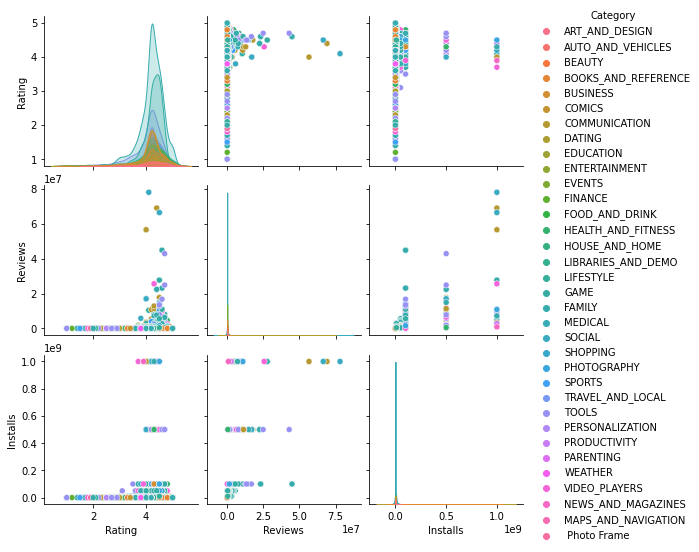

In [17]:
sns.pairplot(apps, hue='Category')

In [18]:
df.to_csv('googleplaystore_prepare.csv',index=False)

In [19]:
#df=df.loc[df['Installs']<1_000_000]

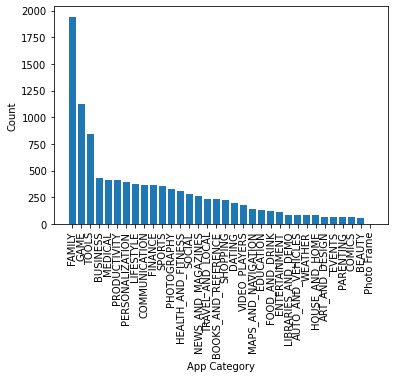

In [20]:
category_counts=df['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Count')
plt.show()

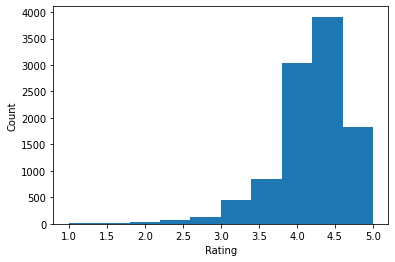

In [21]:
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

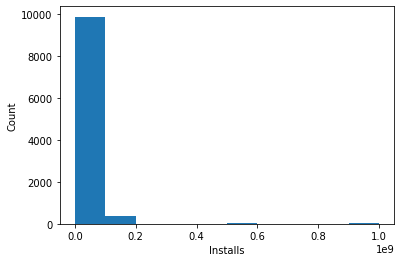

In [22]:
plt.hist(df['Installs'])
plt.xlabel('Installs')
plt.ylabel('Count')
plt.show()

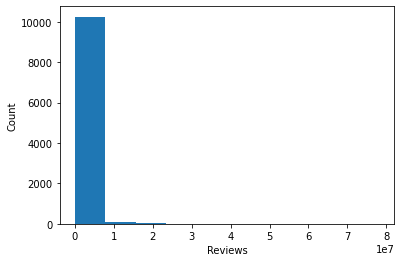

In [23]:
plt.hist(df['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.show()

In [24]:
summary_stats=df[['Rating','Reviews','Installs']].describe()
summary_stats

,Rating,Reviews,Installs
count,10358.00000,1.035800e+04,1.035800e+04
mean,4.18817,4.058654e+05,1.415639e+07
std,0.48452,2.696651e+06,8.023580e+07
min,1.00000,0.000000e+00,0.000000e+00
25%,4.10000,3.200000e+01,1.000000e+03
50%,4.20000,1.678500e+03,1.000000e+05
75%,4.50000,4.640425e+04,1.000000e+06
max,5.00000,7.815831e+07,1.000000e+09


In [25]:
# сглаживание выбросов
z_scores = stats.zscore(df['Installs'])
threshold = 3
outliers = df['Installs'][z_scores > threshold]
df.loc[z_scores > threshold, 'Installs'] = df['Installs'].median()

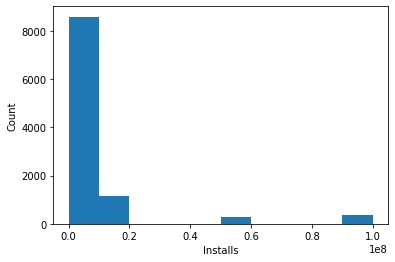

In [26]:
plt.hist(df['Installs'])
plt.xlabel('Installs')
plt.ylabel('Count')
plt.show()

In [27]:
# сглаживание выбросов
z_scores = stats.zscore(df['Reviews'])
threshold = 3
outliers = df['Reviews'][z_scores > threshold]
df.loc[z_scores > threshold, 'Reviews'] = df['Reviews'].median()

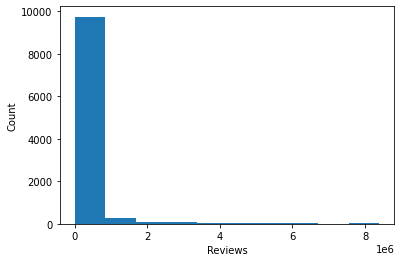

In [28]:
plt.hist(df['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.show()

In [29]:
# Винсонаризация - выбросы принимают заданную нижнию и вернию границу№
df['Rating'] = winsorize(df['Rating'], limits=[0.1, 0.1]) 

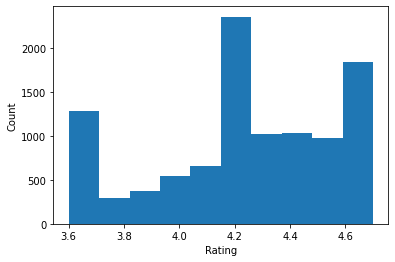

In [30]:
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [31]:
# стандартизация - медиана = 0, std стремиться к 1, применяется для машинного обучения
scaler = StandardScaler()
df[['Rating']] = scaler.fit_transform(df[['Rating']])

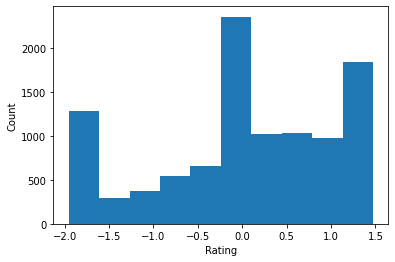

In [32]:
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [33]:
df = pd.read_csv('googleplaystore.csv')

In [34]:
# Кодирование данных для машинного обучения
le = LabelEncoder()
df['Type_Encoded'] = le.fit_transform(df['Type'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [35]:
# one-hot encoding тоже для машинного обучения
df = pd.get_dummies(df, columns=['Content Rating'], prefix='ContentRating', drop_first=True)

In [36]:
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Encoded,ContentRating_Everyone,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen,ContentRating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0,1,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0,1,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0,1,0,0,0,0


In [37]:
pivot_table = df.pivot_table(index='Category', columns='ContentRating_Teen', values='Rating', aggfunc='mean')
pivot_table

ContentRating_Teen,0,1
Category,,
Photo Frame,1.900000,NaN
ART_AND_DESIGN,4.352542,4.466667
AUTO_AND_VEHICLES,4.190278,4.200000
BEAUTY,4.292500,4.000000
BOOKS_AND_REFERENCE,4.351266,4.305000
BUSINESS,4.119064,4.300000
COMICS,4.230556,4.031818
COMMUNICATION,4.145724,4.320833
DATING,3.982540,3.600000
